# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import random

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [5]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

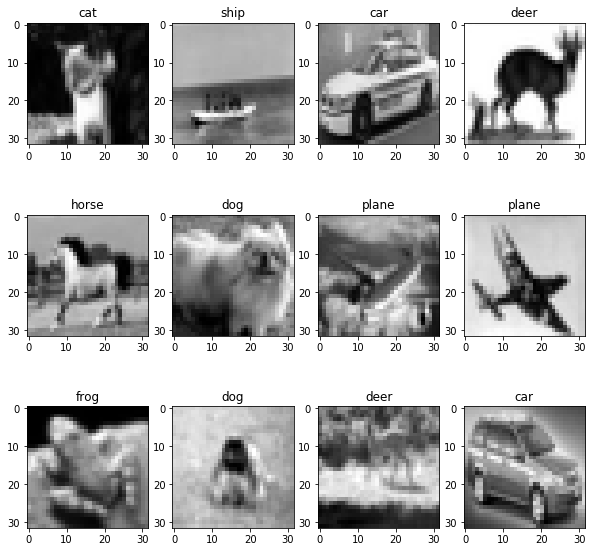

In [6]:
# Mostrar imagens

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    image_index = random.randint(0, len(dataset_train))
    label = grayscale_dataset_train[image_index][1]
    npimg = grayscale_dataset_train[image_index][0]

    fig.add_subplot(rows, columns, i)
    
    plt.imshow(npimg, cmap='gray')
    plt.title(label)
    
plt.show()

In [7]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [9]:
class Perceptron(object):
    
    def __init__(self, neta=0.001):
        self.neta = neta
        self.weights = (np.random.rand(1,size) - 0.5)[0]
        bias = (np.random.rand(1) - 0.5) 
        self.weights = np.append(self.weights, bias) 
        self.accuracies = []
        self.losses = []
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def predict(self, inputs):
        o = np.dot(inputs, self.weights)
        y = self.sigmoid(o)
        return y
    

    def evaluate(self, dataset):
        hits = 0
        for image,label in dataset:
            image = np.append(image, 1)
            # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
            y = self.predict(image)

            if(y >= 0.5 and label == 1):
                hits += 1

            elif(y < 0.5 and label == 0):
                hits += 1

        accuracy = hits / len(dataset)
        return accuracy
    
    
    def train(self, dataset, epochs=100, verbose="not_verbose"):
        np.random.shuffle(dataset)

        
        
        for epoch in range(epochs):
            hits = 0
            loss = 0
            for image, label in dataset:
                image = np.append(image, 1)

                y = self.predict(image)

                if(y >= 0.5 and label == 1):
                    hits += 1

                elif(y < 0.5 and label == 0):
                    hits += 1

                delta_weights = self.neta * (label - y) * image * y * (1 - y)
                self.weights += delta_weights
                loss += (label - y)**2

            accuracy = hits / len(linear_dataset_train)
            self.accuracies = np.append(self.accuracies, accuracy)
            self.losses = np.append(self.losses, loss)

            if(verbose == "verbose"):
                print("%5.0f %12f %15f" %(epoch+1, accuracy, loss))
                #print(epoch,"\t", accuracy, "\t", loss)
            
    
    def plotResults(self):
        plt.plot(self.accuracies)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title("Training Accuracy")
        plt.show()

        plt.plot(self.losses)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Training Loss")
        plt.show()

# Treinando o perceptron

In [10]:
p0 = Perceptron()
p0.train(linear_dataset_train, 100, "verbose")

    1     0.655240    12338.615652
    2     0.694400    10886.951649
    3     0.700440    10600.785233
    4     0.703580    10422.211092
    5     0.705820    10286.916227
    6     0.708340    10177.879396
    7     0.710360    10087.609656
    8     0.711640    10011.632997
    9     0.713940     9946.907131
   10     0.715120     9891.232173
   11     0.716400     9842.956736
   12     0.717220     9800.807267
   13     0.717620     9763.780523
   14     0.718160     9731.072479
   15     0.719100     9702.029708
   16     0.719720     9676.115175
   17     0.720980     9652.883510
   18     0.721660     9631.962692
   19     0.722020     9613.040153
   20     0.722200     9595.852016
   21     0.722500     9580.174609
   22     0.722840     9565.817673
   23     0.723460     9552.618859
   24     0.723620     9540.439229
   25     0.724260     9529.159551
   26     0.724480     9518.677232
   27     0.725200     9508.903759
   28     0.725480     9499.762569
   29     0.725700  

In [11]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?

# A acurácia no conjunto de treino é maior devido ao overfitting do conjunto de treinamento.
# Analogamente, a acurácia do conjunto de teste é menor justamente pelo fato de que as imagens do 
# conjunto de teste nunca foram apresentadas ao modelo.

accuracy_train = p0.evaluate(linear_dataset_train)
accuracy_test = p0.evaluate(linear_dataset_test)

print("Train Accuracy: ", accuracy_train, "\tTest Accuracy: ", accuracy_test)


Train Accuracy:  0.73524 	Test Accuracy:  0.7268


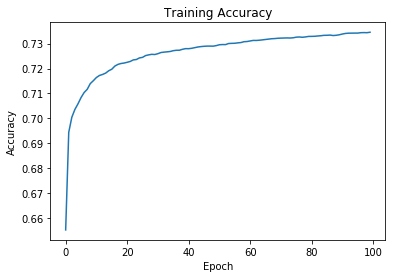

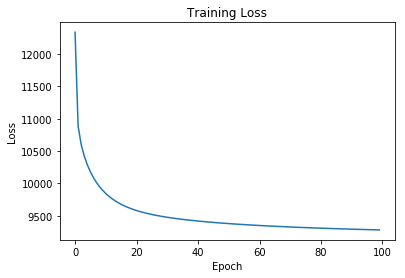

In [12]:
# Caso queiram plotar alguma coisa

p0.plotResults()


# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [13]:
def classes_get(x):
    return {
        0: "plane",
        1: "car",
        2: "bird",
        3: "cat",
        4: "deer",
        5: "dog",
        6: "frog",
        7: "horse",
        8: "ship",
        9: "truck",
    }[x]

In [14]:
# converter para vetores 1D

linear_dataset_array_train = [[] for i in range(10)]
linear_dataset_array_test = [[] for i in range(10)]

for index in range(10):
    
    target_labels = classes_get(index)
    for img,category in grayscale_dataset_train:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        #linear_img = img
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_array_train[index].append((linear_img,label))

    
    
    for img,category in grayscale_dataset_test:
        linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
        #linear_img = img
        if category in target_labels:
            label = 1
        else:
            label = 0
        linear_dataset_array_test[index].append((linear_img,label))
    

In [15]:
print(len(linear_dataset_array_train))
print(len(linear_dataset_array_train[0]))

print(len(linear_dataset_array_test))
print(len(linear_dataset_array_test[0]))

10
50000
10
10000


############################################
Training Perceptron 0
    1     0.801040     7793.288696
    2     0.876560     5749.070766
    3     0.887740     5415.513162
    4     0.891920     5281.747766
    5     0.893860     5210.555030
    6     0.895280     5166.646679
    7     0.896320     5136.978220
    8     0.896880     5115.645346
    9     0.897160     5099.598153
   10     0.897560     5087.106522
   11     0.897760     5077.117774
   12     0.898020     5068.955555
   13     0.898220     5062.165925
   14     0.898380     5056.433140
   15     0.898560     5051.530931
   16     0.898600     5047.292998
   17     0.898640     5043.594436
   18     0.898760     5040.339650
   19     0.898800     5037.454258
   20     0.898860     5034.879533
   21     0.898900     5032.568506
   22     0.898960     5030.483171
   23     0.899020     5028.592449
   24     0.899060     5026.870688
   25     0.899100     5025.296528
   26     0.899100     5023.852043
   27     0.899160     

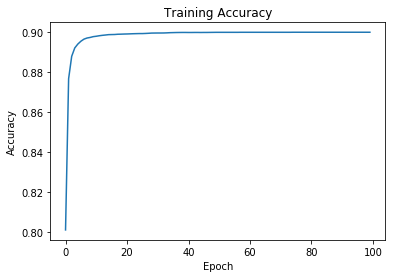

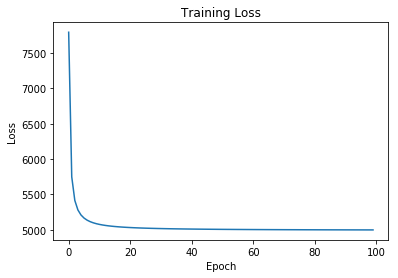




############################################
Training Perceptron 1
    1     0.565100    16048.697412
    2     0.867880     5608.027386
    3     0.883200     5179.606909
    4     0.887580     5057.076165
    5     0.889980     5001.576886
    6     0.891560     4970.867477
    7     0.892700     4951.754736
    8     0.893420     4938.874758
    9     0.894200     4929.670391
   10     0.894640     4922.783039
   11     0.894840     4917.431478
   12     0.895120     4913.138455
   13     0.895340     4909.598105
   14     0.895460     4906.606628
   15     0.895620     4904.023780
   16     0.895720     4901.750396
   17     0.895940     4899.714712
   18     0.896100     4897.863745
   19     0.896240     4896.157687
   20     0.896380     4894.566173
   21     0.896380     4893.065718
   22     0.896400     4891.637948
   23     0.896440     4890.268324
   24     0.896480     4888.945238
   25     0.896520     4887.659338
   26     0.896620     4886.403033
   27     0.896640  

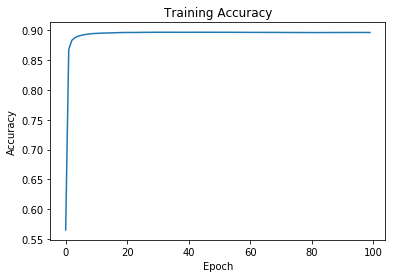

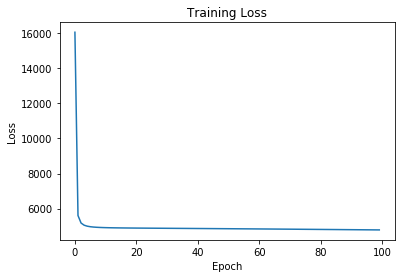




############################################
Training Perceptron 2
    1     0.521900    17827.362247
    2     0.844920     6326.867875
    3     0.876120     5543.153804
    4     0.885320     5313.742245
    5     0.889100     5209.156798
    6     0.891260     5150.661627
    7     0.892760     5113.804426
    8     0.893680     5088.691217
    9     0.894500     5070.604726
   10     0.895100     5057.028311
   11     0.895600     5046.504542
   12     0.896200     5038.134785
   13     0.896420     5031.336800
   14     0.896600     5025.717861
   15     0.896820     5021.004091
   16     0.897020     5016.999054
   17     0.897140     5013.558433
   18     0.897260     5010.573976
   19     0.897400     5007.962997
   20     0.897540     5005.661319
   21     0.897660     5003.618420
   22     0.897740     5001.794020
   23     0.897780     5000.155634
   24     0.897880     4998.676794
   25     0.897920     4997.335729
   26     0.898000     4996.114381
   27     0.898020  

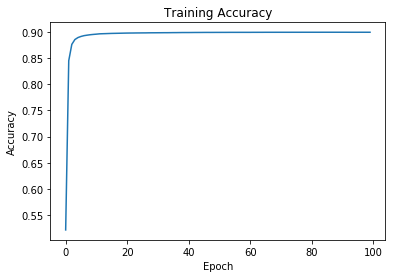

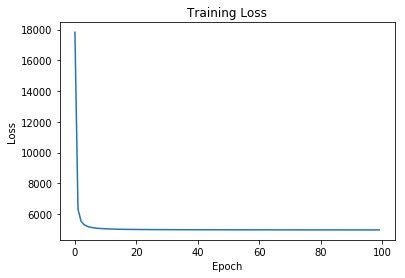




############################################
Training Perceptron 3
    1     0.851100     6162.237989
    2     0.879280     5375.760858
    3     0.886220     5197.300409
    4     0.889400     5119.751979
    5     0.890940     5076.960635
    6     0.892060     5050.089734
    7     0.892960     5031.777133
    8     0.893660     5018.569296
    9     0.894480     5008.637934
   10     0.895200     5000.927519
   11     0.895540     4994.787491
   12     0.895880     4989.795840
   13     0.896160     4985.667318
   14     0.896340     4982.202487
   15     0.896420     4979.257901
   16     0.896520     4976.727884
   17     0.896740     4974.532954
   18     0.896900     4972.612254
   19     0.897040     4970.918443
   20     0.897100     4969.414185
   21     0.897280     4968.069662
   22     0.897300     4966.860797
   23     0.897440     4965.767952
   24     0.897580     4964.774966
   25     0.897620     4963.868427
   26     0.897680     4963.037119
   27     0.897700  

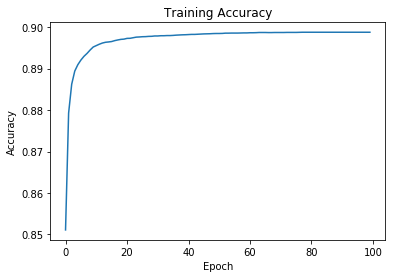

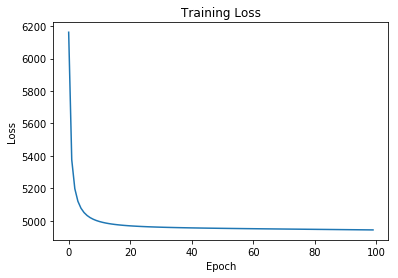




############################################
Training Perceptron 4
    1     0.847220     6412.772089
    2     0.878620     5507.721601
    3     0.886740     5295.552518
    4     0.890140     5201.323417
    5     0.892100     5148.746920
    6     0.893700     5115.573052
    7     0.894820     5092.935192
    8     0.895600     5076.614767
    9     0.895900     5064.357159
   10     0.896340     5054.853230
   11     0.896600     5047.293825
   12     0.897020     5041.153691
   13     0.897300     5036.078089
   14     0.897500     5031.819453
   15     0.897520     5028.200170
   16     0.897600     5025.089761
   17     0.897680     5022.390390
   18     0.897760     5020.027369
   19     0.897860     5017.942768
   20     0.897920     5016.091019
   21     0.897980     5014.435820
   22     0.898020     5012.947919
   23     0.898080     5011.603502
   24     0.898220     5010.382998
   25     0.898220     5009.270183
   26     0.898320     5008.251503
   27     0.898420  

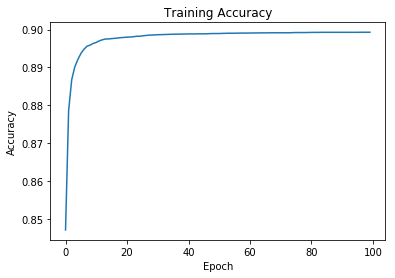

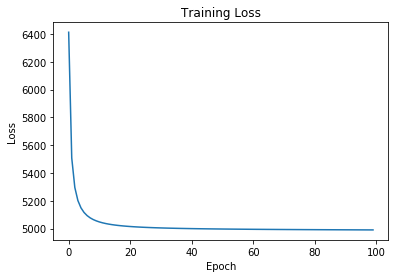




############################################
Training Perceptron 5
    1     0.107920    42653.092516
    2     0.184800    34733.894580
    3     0.770940     8716.387537
    4     0.871860     5726.466489
    5     0.883800     5371.077147
    6     0.888320     5240.423470
    7     0.891160     5173.646942
    8     0.892780     5133.556212
    9     0.894080     5107.038306
   10     0.894940     5088.313423
   11     0.895460     5074.449905
   12     0.895820     5063.808887
   13     0.896100     5055.406030
   14     0.896340     5048.616402
   15     0.896700     5043.025272
   16     0.897080     5038.347223
   17     0.897240     5034.379772
   18     0.897340     5030.975513
   19     0.897540     5028.024724
   20     0.897620     5025.444140
   21     0.897720     5023.169486
   22     0.897840     5021.150397
   23     0.897900     5019.346874
   24     0.898000     5017.726766
   25     0.898080     5016.263945
   26     0.898240     5014.936973
   27     0.898260  

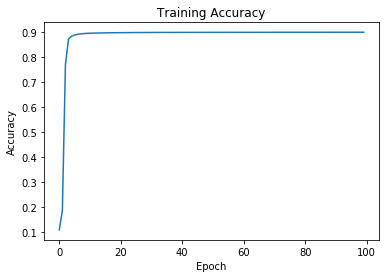

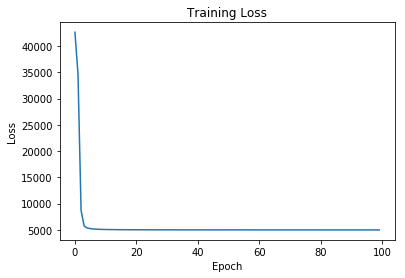




############################################
Training Perceptron 6
    1     0.584440    15379.993529
    2     0.863980     5738.264878
    3     0.882660     5280.397859
    4     0.888320     5148.665662
    5     0.890780     5088.442071
    6     0.892540     5054.616605
    7     0.893660     5033.221213
    8     0.894400     5018.596841
    9     0.895080     5008.039139
   10     0.895600     5000.101120
   11     0.895840     4993.941976
   12     0.896200     4989.041392
   13     0.896520     4985.060997
   14     0.896620     4981.771736
   15     0.896860     4979.013329
   16     0.897000     4976.670462
   17     0.897160     4974.658183
   18     0.897280     4972.912620
   19     0.897380     4971.384889
   20     0.897540     4970.036993
   21     0.897540     4968.838982
   22     0.897640     4967.766962
   23     0.897720     4966.801657
   24     0.897780     4965.927360
   25     0.897840     4965.131158
   26     0.897900     4964.402347
   27     0.897980  

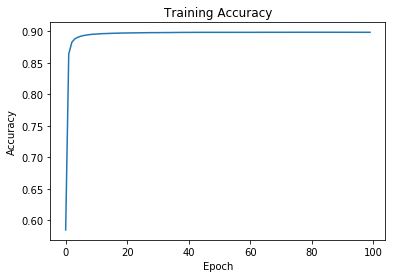

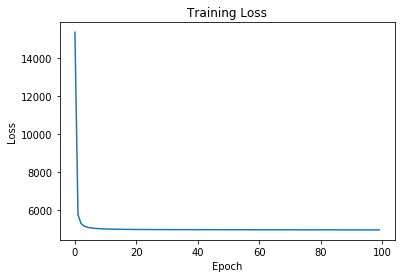




############################################
Training Perceptron 7
    1     0.854180     6135.240741
    2     0.874820     5588.758074
    3     0.882340     5391.875556
    4     0.886740     5290.828327
    5     0.889500     5229.679097
    6     0.891300     5188.868800
    7     0.892620     5159.786976
    8     0.893400     5138.061158
    9     0.894320     5121.240755
   10     0.894860     5107.848660
   11     0.895180     5096.943159
   12     0.895460     5087.896424
   13     0.895760     5080.274317
   14     0.895900     5073.767357
   15     0.896080     5068.149155
   16     0.896320     5063.250400
   17     0.896460     5058.942009
   18     0.896660     5055.123892
   19     0.896780     5051.717279
   20     0.896900     5048.659347
   21     0.897100     5045.899394
   22     0.897320     5043.396058
   23     0.897380     5041.115268
   24     0.897400     5039.028710
   25     0.897420     5037.112662
   26     0.897440     5035.347102
   27     0.897480  

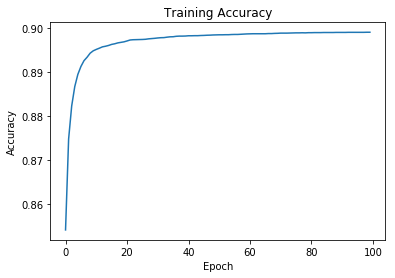

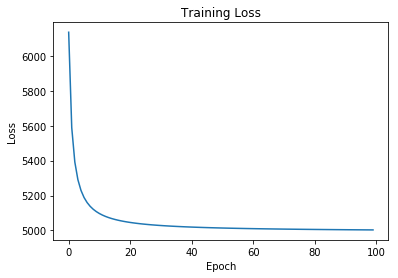




############################################
Training Perceptron 8
    1     0.629860    13501.793986
    2     0.870840     5791.225357
    3     0.885840     5369.291493
    4     0.890800     5234.454726
    5     0.893020     5168.933940
    6     0.894560     5130.569721
    7     0.895480     5105.526175
    8     0.896100     5087.961877
    9     0.896660     5074.999216
   10     0.896940     5065.061815
   11     0.897200     5057.215934
   12     0.897520     5050.874229
   13     0.897680     5045.649214
   14     0.897820     5041.275150
   15     0.898020     5037.563851
   16     0.898200     5034.378399
   17     0.898320     5031.616858
   18     0.898460     5029.201808
   19     0.898540     5027.073421
   20     0.898540     5025.184757
   21     0.898580     5023.498484
   22     0.898660     5021.984550
   23     0.898820     5020.618504
   24     0.898840     5019.380254
   25     0.898860     5018.253145
   26     0.898880     5017.223254
   27     0.898940  

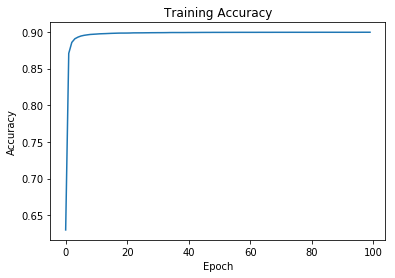

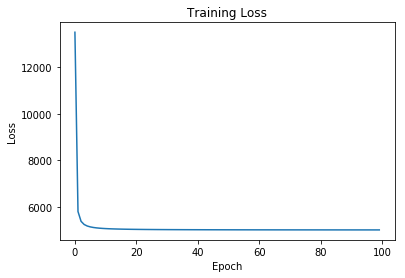




############################################
Training Perceptron 9
    1     0.885180     5176.137633
    2     0.891120     4992.001461
    3     0.893540     4936.479574
    4     0.894640     4910.240059
    5     0.895160     4894.625045
    6     0.895520     4883.803981
    7     0.895940     4875.431967
    8     0.896140     4868.406723
    9     0.896260     4862.151569
   10     0.896400     4856.340420
   11     0.896560     4850.777872
   12     0.896660     4845.341665
   13     0.896620     4839.952918
   14     0.896660     4834.559782
   15     0.896600     4829.127998
   16     0.896560     4823.635194
   17     0.896620     4818.067313
   18     0.896640     4812.416282
   19     0.896600     4806.678442
   20     0.896540     4800.853446
   21     0.896420     4794.943461
   22     0.896300     4788.952573
   23     0.896260     4782.886326
   24     0.896260     4776.751361
   25     0.896200     4770.555124
   26     0.896140     4764.305632
   27     0.896140  

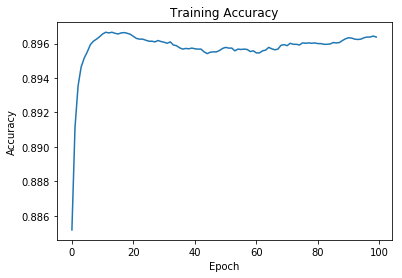

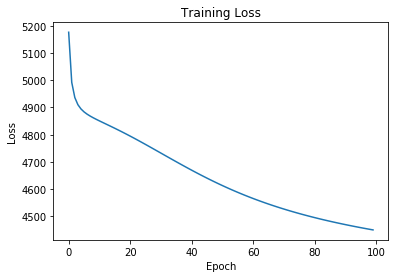

In [19]:

perceptrons = [Perceptron(0.00001) for i in range(10)]
index = 0

for p in perceptrons:
    print("############################################")
    print("Training Perceptron", index)

    p.train(linear_dataset_array_train[index], 100, "verbose")

    accuracy_train = p.evaluate(linear_dataset_array_train[index])
    accuracy_test = p.evaluate(linear_dataset_array_test[index])

    print("\nTrain Accuracy: ", accuracy_train, "\tTest Accuracy: ", accuracy_test, "\n")

    p.plotResults()

    print("\n\n")
    index += 1


In [20]:

linear_dataset_test_labels = []

for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    label = classes.index(category)
    linear_dataset_test_labels.append((linear_img,label))


In [26]:
hits = 0
most_active_perceptron = 0
max_output = 0

for image,label in linear_dataset_test_labels:
    image = np.append(image, 1)
    index = 0
    
    for p in perceptrons:
        result = p.predict(image)
        if result > max_output:
            max_output = result
            most_active_perceptron = index
        index += 1
        
    if label == most_active_perceptron:
        hits += 1
        
    max_output = 0
accuracy = hits / len(linear_dataset_test_labels)

print(accuracy)

0.1173
